# Prerequisite

## Participating the Competition
다음 링크에서 Kaggle Competition에 참가: https://www.kaggle.com/competitions/2024-knu-ml-ind-asmt3

주의: 참가 시 Team - Team Name을 **학번 / 이름**으로 설정

## Data Download

Kaggle 프로필 아이콘 - Settings - API - Create New Token 선택 후 다운로드 된 **kaggle.json**에서, **username**과 **key** 값을 아래에 기록

In [ ]:
USERNAME = "liebenholz" # username
USERKEY = "" # key

Kaggle 인증 정보 생성


In [ ]:
import json

json.dump({'username': USERNAME, 'key': USERKEY}, open('kaggle.json', mode='w'))

만약 Colab이 아닌 로컬 환경에서 하고 싶다면 OS에 따라 인증 정보 설정 방법이 다르므로, [Kaggle API](https://github.com/Kaggle/kaggle-api)를 참조

In [ ]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download --force 2024-knu-ml-ind-asmt3
!unzip 2024-knu-ml-ind-asmt3.zip

  0% 0.00/125k [00:00<?, ?B/s]
100% 125k/125k [00:00<00:00, 17.6MB/s]
Archive:  2024-knu-ml-ind-asmt3.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Installing Libraries
* [scikit-learn](https://scikit-learn.org/stable/index.html): 다목적 기계 학습 라이브러리
* [numpy](https://numpy.org/): 배열 유틸리티
* [pandas](https://pandas.pydata.org/): 데이터 활용 유틸리티
* [altair](https://altair-viz.github.io/index.html): 시각화
* [kaggle](https://github.com/Kaggle/kaggle-api): Kaggle API 활용

In [ ]:
!pip install -q scikit-learn==1.4.1.post1 numpy pandas altair kaggle==1.6.6 graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Data Exploration / Preprocessing



다운로드 받은 데이터를 Pandas Dataframe으로 불러옴

In [ ]:
import pandas as pd

TRAIN = pd.read_csv('./train.csv', index_col='id')

데이터 예시

In [ ]:
TRAIN.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
id,,,,,,,,,,,,,,,,,,,,,
3207.0,1.0,1.0,1.0,15.0,1.0,1.0,1.0,2.0,3.0,4.0,...,0.0,6.0,9.0,6.0,11.571429,0.0,15.5,2.8,-4.06,0.0
3731.0,1.0,16.0,1.0,5.0,1.0,1.0,1.0,23.0,28.0,10.0,...,4.0,12.0,12.0,4.0,13.500000,0.0,8.9,1.4,3.51,0.0
884.0,1.0,7.0,2.0,12.0,1.0,1.0,1.0,2.0,28.0,5.0,...,0.0,8.0,12.0,7.0,12.600000,0.0,10.8,1.4,1.74,2.0
1394.0,1.0,8.0,5.0,15.0,1.0,1.0,1.0,23.0,28.0,29.0,...,0.0,6.0,6.0,6.0,12.500000,0.0,8.9,1.4,3.51,2.0
2659.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,22.0,27.0,4.0,...,0.0,6.0,6.0,5.0,12.200000,0.0,11.1,0.6,2.02,0.0


데이터 타입

In [ ]:
TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, 3207.0 to 967.0
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  2654 non-null   float64
 1   Application mode                                2654 non-null   float64
 2   Application order                               2654 non-null   float64
 3   Course                                          2654 non-null   float64
 4   evening attendance                              2654 non-null   float64
 5   Previous qualification                          2654 non-null   float64
 6   Nacionality                                     2654 non-null   float64
 7   Mother's qualification                          2654 non-null   float64
 8   Father's qualification                          2654 non-null   float64
 9   Mother's occupation                     

Pandas Dataframe에서 object 데이터 타입은 보통 문자열 등의 범주형Categorical 데이터, int 또는 float는 수치형Numerical 데이터로 이해하면 됨

## Check Missing Data

데이터가 결측치가 없이 제대로 수집되어 있는지 확인

In [ ]:
for c in TRAIN.columns:
    print(f'{c}: {len(TRAIN[c].loc[TRAIN[c].isnull()])}')

Marital status: 0
Application mode: 0
Application order: 0
Course: 0
evening attendance: 0
Previous qualification: 0
Nacionality: 0
Mother's qualification: 0
Father's qualification: 0
Mother's occupation: 0
Father's occupation: 0
Displaced: 0
Educational special needs: 0
Debtor: 0
Tuition fees up to date: 0
Gender: 0
Scholarship holder: 0
Age at enrollment: 0
International: 0
Curricular units 1st sem (credited): 0
Curricular units 1st sem (enrolled): 0
Curricular units 1st sem (evaluations): 0
Curricular units 1st sem (approved): 0
Curricular units 1st sem (grade): 0
Curricular units 1st sem (without evaluations): 0
Curricular units 2nd sem (credited): 0
Curricular units 2nd sem (enrolled): 0
Curricular units 2nd sem (evaluations): 0
Curricular units 2nd sem (approved): 0
Curricular units 2nd sem (grade): 0
Curricular units 2nd sem (without evaluations): 0
Unemployment rate: 0
Inflation rate: 0
GDP: 0
Output: 0


결측치 없으므로 결측치 제거 작업은 생략한다.

## Exploration: Continuous Variable


In [ ]:
TRAIN.describe()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
count,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,...,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000,2654.000000
mean,1.170309,6.787491,1.724190,9.843632,0.892615,2.548606,1.223060,12.296910,16.427656,7.226451,...,0.558402,6.211756,7.986059,4.417106,10.159130,0.137528,11.563112,1.209608,-0.003779,1.177845
std,0.580179,5.308150,1.293101,4.364996,0.309661,3.991285,1.615738,8.990635,10.989691,3.786963,...,1.946751,2.266040,4.007178,3.052454,5.274060,0.710378,2.657757,1.381915,2.267766,0.888435
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.717532,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,20.000000,28.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


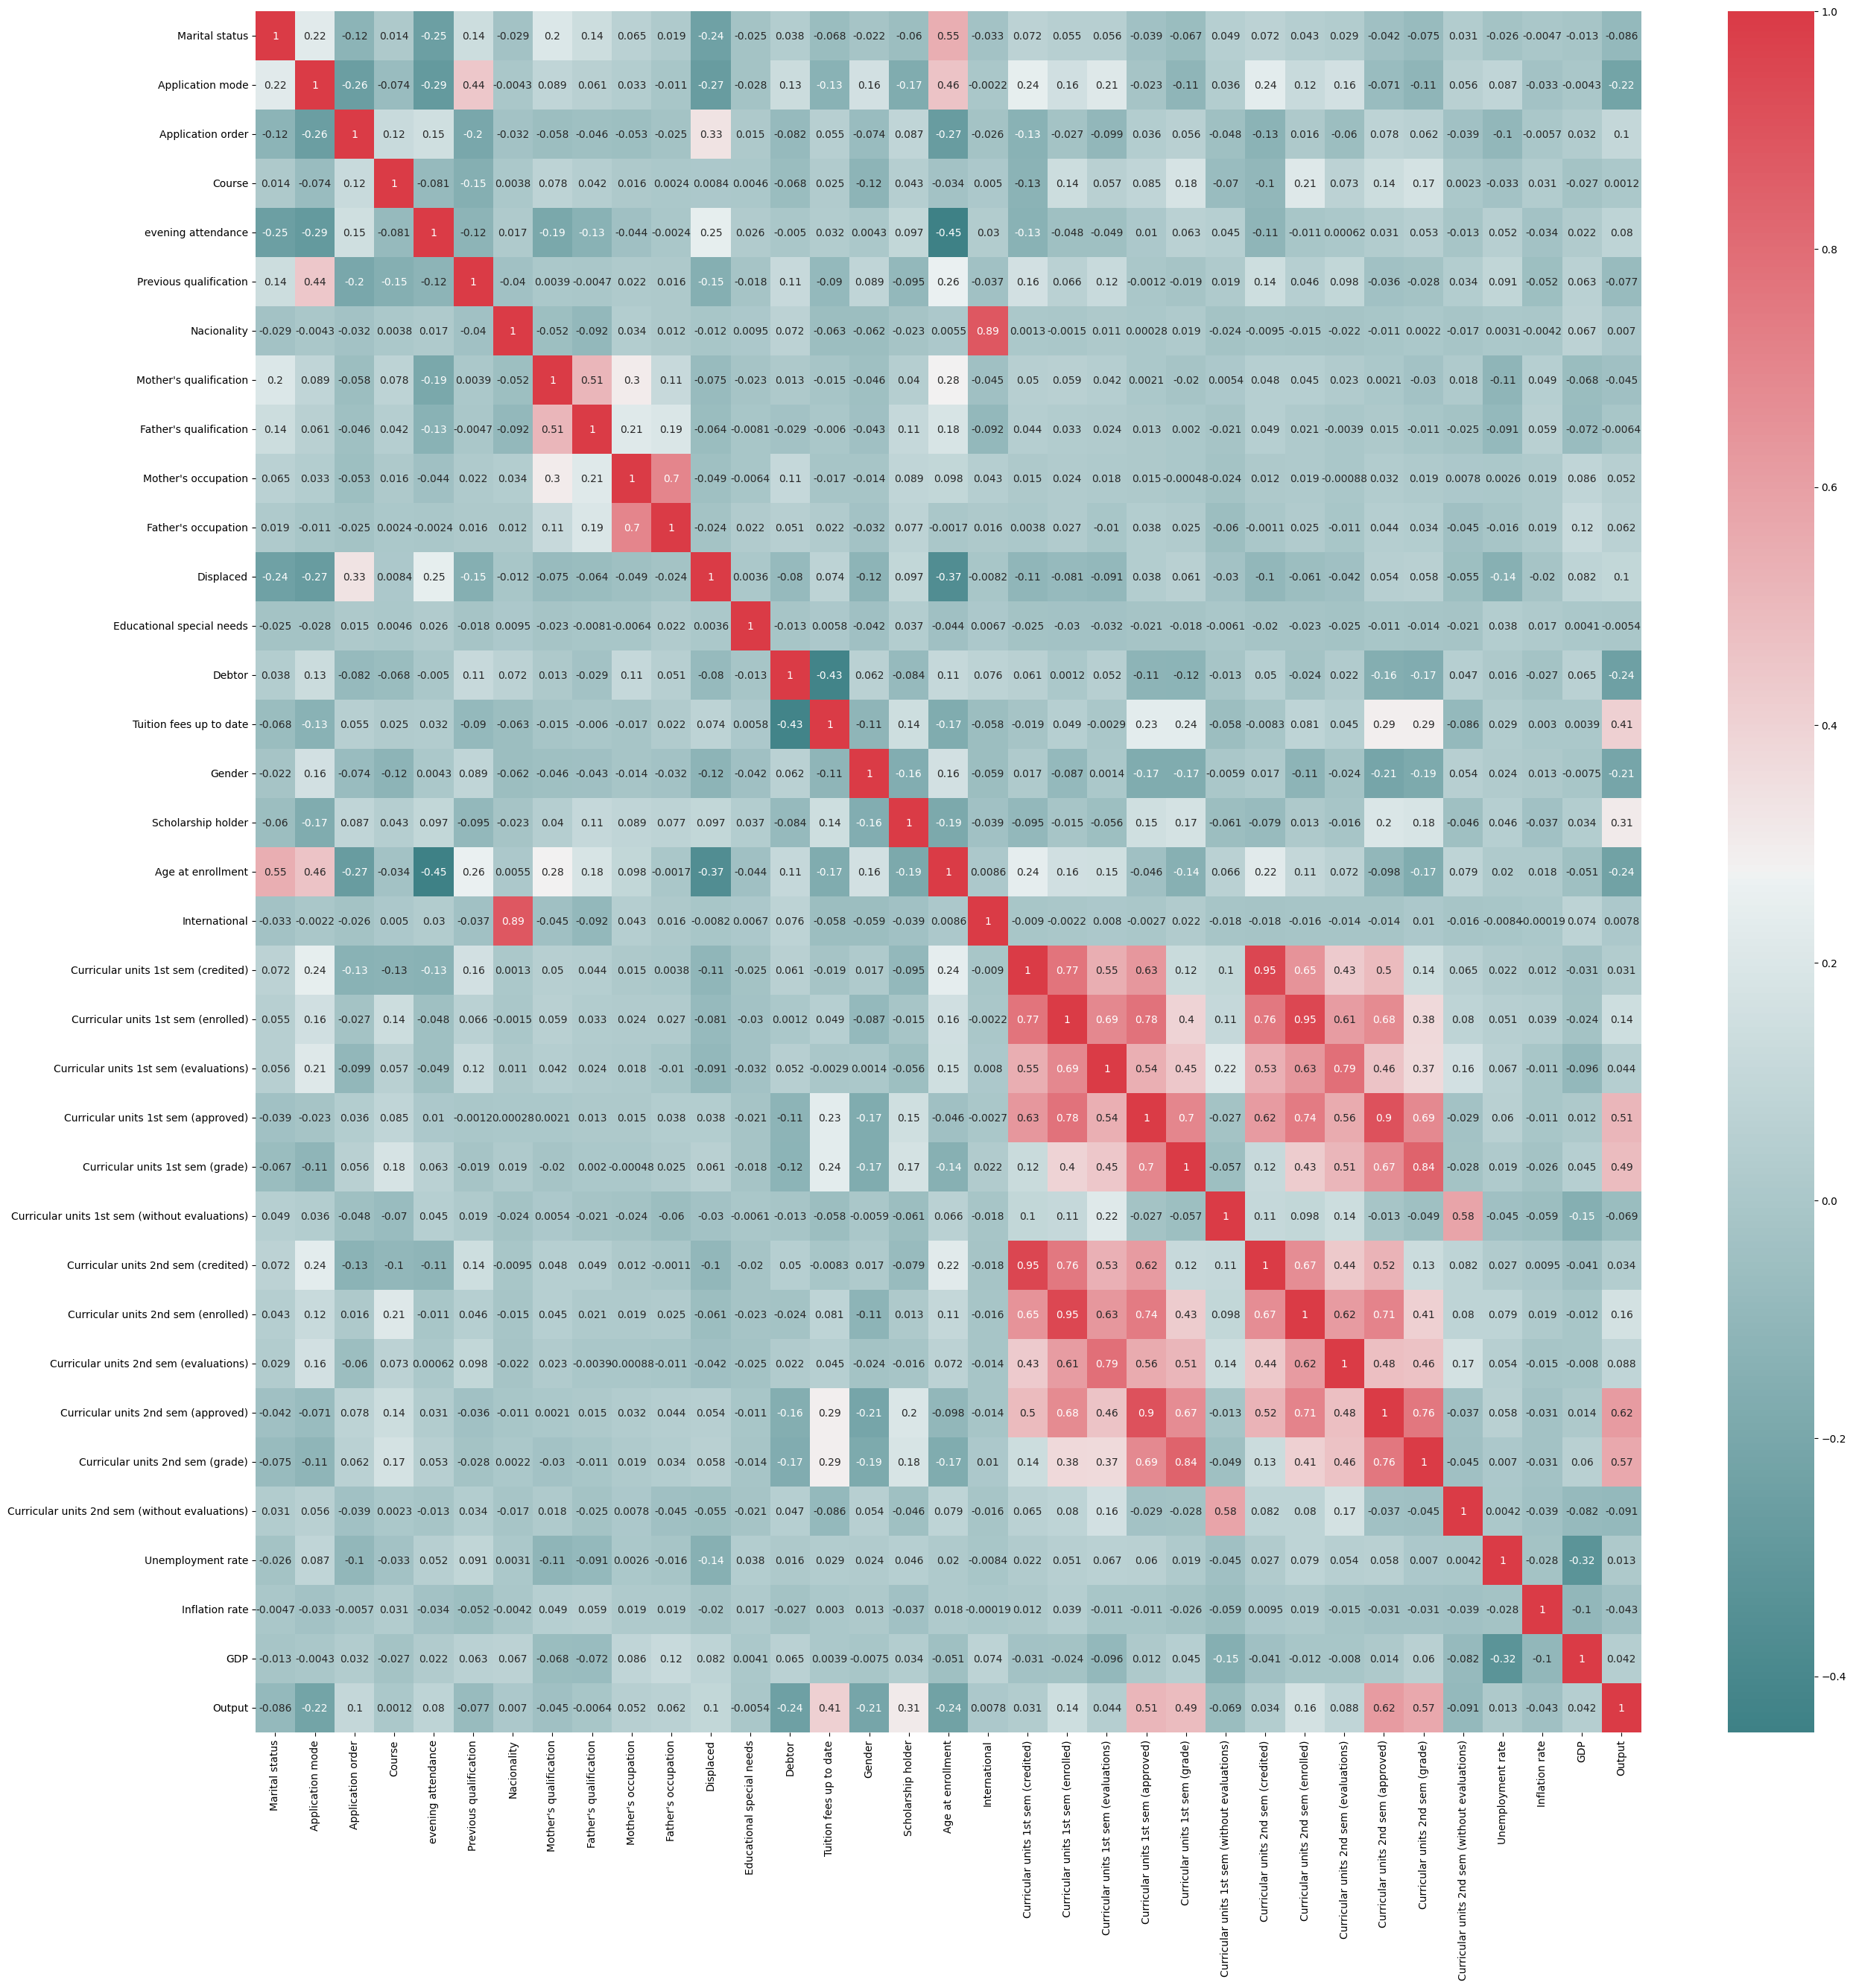

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,30))
corr = TRAIN.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

* 아버지 학력과 어머니 학력은 0.51의 높은 상관을 가짐.
* 아버지 벌이와 어머니 벌이는 0.70의 높은 상관을 가짐.
* 학비 최신화가 채무자는 -0.43의 음적 상관을 가짐. 즉, 채무자는 학비를 최근에 제출하지 못함.
* 등록 나이는 주/야 수업 참여와 -0.45의 음적 상관을 지님
* 국제학생은 국적과 0.89의 매우 높은 상관을 가짐.
* 교과 단위 군은 서로 높은 양의 상관을 가짐. 그 중에서 무시험 교과 단위는 상관관계가 떨어짐.

In [ ]:
TRAIN_CORR = TRAIN.corr()['Output']
TRAIN_ABS = TRAIN_CORR.abs().sort_values(ascending=True)
TRAIN_ABS = pd.DataFrame(TRAIN_ABS)
TRAIN_ABS

,Output
Course,0.001245
Educational special needs,0.005358
Father's qualification,0.006442
Nacionality,0.007015
International,0.007790
Unemployment rate,0.012916
Curricular units 1st sem (credited),0.031226
Curricular units 2nd sem (credited),0.033874
GDP,0.041947
Inflation rate,0.042931


* Course	0.001245
* Educational special needs	0.005358
* Father's qualification	0.006442
* Nacionality	0.007015
* International	0.007790
* Unemployment rate	0.012916

위 feature들은 상관관계가 매우 낮음.

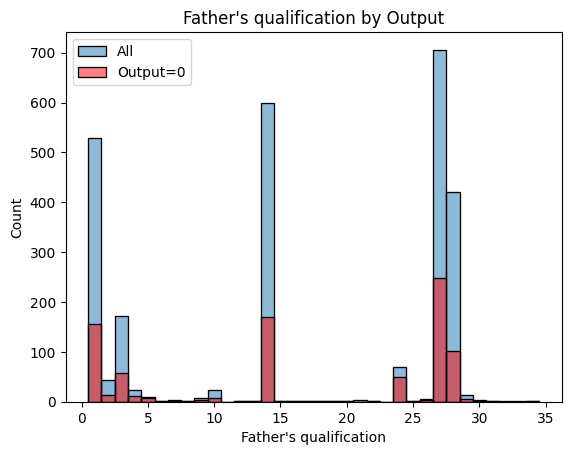

,Total Count,Output=0 Count,Output=0 Ratio
Father's qualification,,,
16.0,1,1.0,1.000000
13.0,1,1.0,1.000000
25.0,1,1.0,1.000000
22.0,1,1.0,1.000000
20.0,2,2.0,1.000000
19.0,1,1.0,1.000000
18.0,1,1.0,1.000000
17.0,1,1.0,1.000000
15.0,1,1.0,1.000000


In [ ]:
sns.histplot(data=TRAIN,
             x="Father's qualification",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Father's qualification",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Father's qualification by Output")
plt.xlabel("Father's qualification")
plt.ylabel("Count")
plt.legend()
plt.show()

# 'Father's qualification'별로 그룹화하고, 각 그룹 내 'Target'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Father's qualification").size()

# 각 'Father's qualification' 범주별 전체 카운트
total_counts = TRAIN.groupby("Father's qualification").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

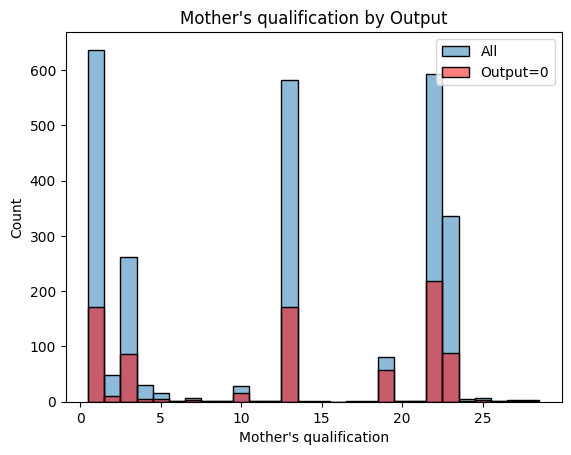

,Total Count,Output=0 Count,Output=0 Ratio
Mother's qualification,,,
12.0,1,1.0,1.000000
21.0,2,2.0,1.000000
9.0,1,1.0,1.000000
11.0,1,1.0,1.000000
20.0,1,1.0,1.000000
19.0,81,58.0,0.716049
27.0,3,2.0,0.666667
7.0,6,4.0,0.666667
10.0,29,16.0,0.551724


In [ ]:
sns.histplot(data=TRAIN,
             x="Mother's qualification",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Mother's qualification",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Mother's qualification by Output")
plt.xlabel("Mother's qualification")
plt.ylabel("Count")
plt.legend()
plt.show()

# 'Mother's qualification'별로 그룹화하고, 각 그룹 내 'Target'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Mother's qualification").size()

# 각 'Mother's qualification' 범주별 전체 카운트
total_counts = TRAIN.groupby("Mother's qualification").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

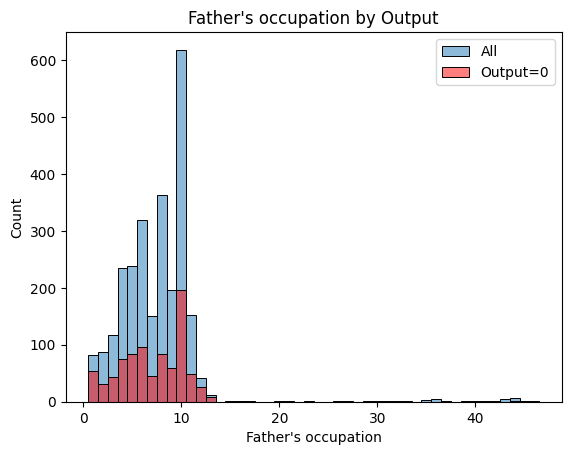

,Total Count,Output=0 Count,Output=0 Ratio
Father's occupation,,,
16.0,1,1.0,1.000000
13.0,11,8.0,0.727273
1.0,82,54.0,0.658537
12.0,42,26.0,0.619048
45.0,2,1.0,0.500000
3.0,117,43.0,0.367521
2.0,87,31.0,0.356322
5.0,239,83.0,0.347280
4.0,234,75.0,0.320513


In [ ]:
sns.histplot(data=TRAIN,
             x="Father's occupation",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Father's occupation",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Father's occupation by Output")
plt.xlabel("Father's occupation")
plt.ylabel("Count")
plt.legend()
plt.show()

# 'Father's occupation'별로 그룹화하고, 각 그룹 내 'Target'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Father's occupation").size()

# 각 'Father's occupation' 범주별 전체 카운트
total_counts = TRAIN.groupby("Father's occupation").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

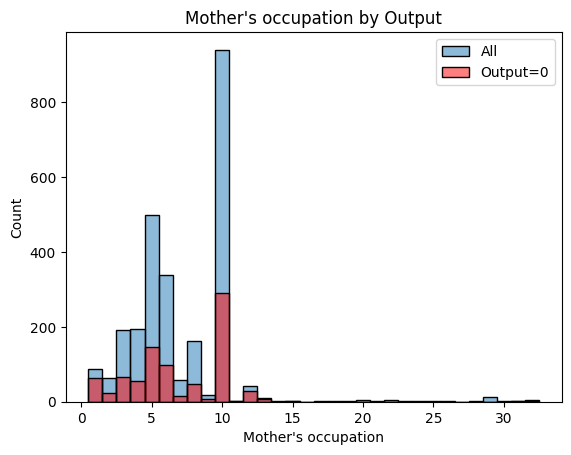

,Total Count,Output=0 Count,Output=0 Ratio
Mother's occupation,,,
31.0,1,1.0,1.000000
13.0,10,8.0,0.800000
1.0,87,63.0,0.724138
12.0,42,29.0,0.690476
9.0,19,8.0,0.421053
3.0,192,67.0,0.348958
2.0,64,22.0,0.343750
11.0,3,1.0,0.333333
15.0,3,1.0,0.333333


In [ ]:
sns.histplot(data=TRAIN,
             x="Mother's occupation",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Mother's occupation",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Mother's occupation by Output")
plt.xlabel("Mother's occupation")
plt.ylabel("Count")
plt.legend()
plt.show()

# 'Mother's occupation'별로 그룹화하고, 각 그룹 내 'Target'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Mother's occupation").size()

# 각 'Mother's occupation' 범주별 전체 카운트
total_counts = TRAIN.groupby("Mother's occupation").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

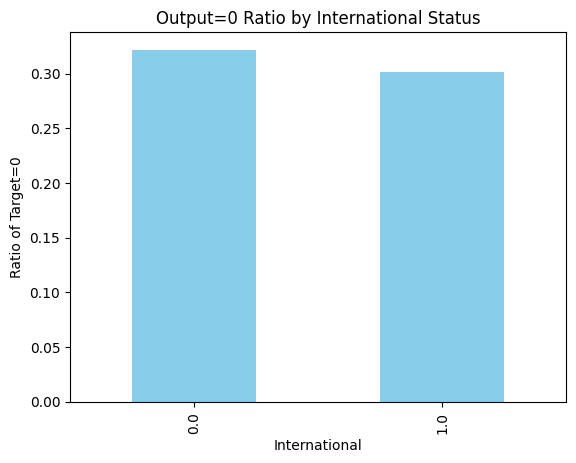

In [ ]:
# `International` 변수와 `Output` 변수를 기준으로 데이터 그룹화
grouped_data = TRAIN.groupby('International')['Output'].value_counts(normalize=True).unstack()

# `Output=0`에 대한 비율을 추출
output_0_ratio = grouped_data[0]

# 비율을 시각화
output_0_ratio.plot(kind='bar', color='skyblue')
plt.title('Output=0 Ratio by International Status')
plt.xlabel('International')
plt.ylabel('Ratio of Target=0')

plt.show()

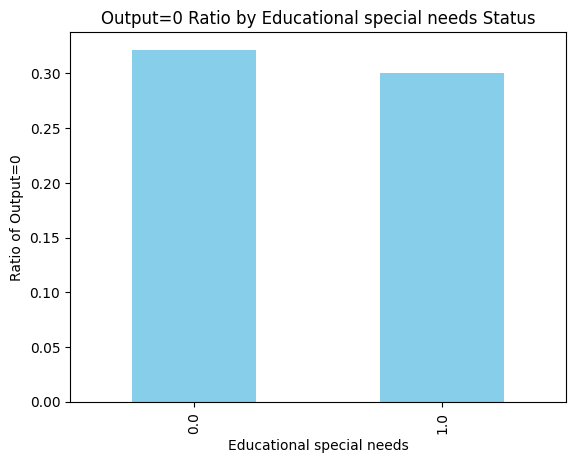

In [ ]:
# `Educational special needs` 변수와 `Target` 변수를 기준으로 데이터 그룹화
grouped_data = TRAIN.groupby('Educational special needs')['Output'].value_counts(normalize=True).unstack()

# `Target=0`에 대한 비율을 추출
output_0_ratio = grouped_data[0]

# 비율을 시각화
output_0_ratio.plot(kind='bar', color='skyblue')
plt.title('Output=0 Ratio by Educational special needs Status')
plt.xlabel('Educational special needs')
plt.ylabel('Ratio of Output=0')

plt.show()

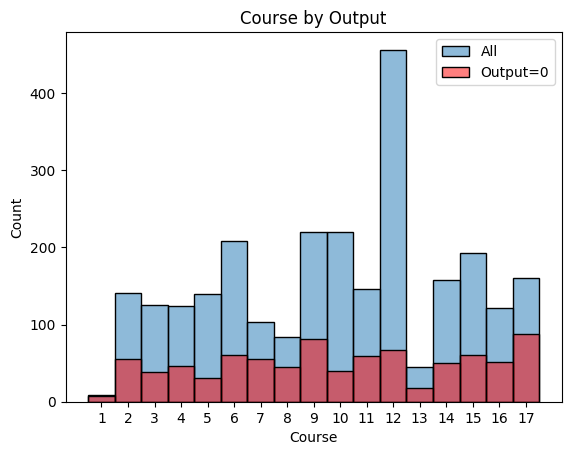

,Total Count,Output=0 Count,Output=0 Ratio
Course,,,
1.0,9,7,0.777778
17.0,160,88,0.550000
8.0,84,45,0.535714
7.0,103,55,0.533981
16.0,122,52,0.426230
11.0,146,59,0.404110
13.0,45,18,0.400000
2.0,141,55,0.390071
4.0,124,46,0.370968


In [ ]:
sns.histplot(data=TRAIN,
             x="Course",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Course",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Course by Output")
plt.xlabel("Course")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(1, 18), labels=np.arange(1, 18))

plt.legend()
plt.show()

# 'Course'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Course").size()

# 각 'Course' 범주별 전체 카운트
total_counts = TRAIN.groupby("Course").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

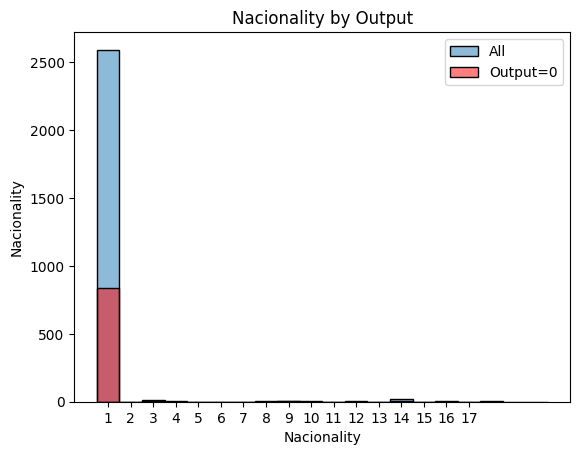

,Total Count,Output=0 Count,Output=0 Ratio
Nacionality,,,
17.0,1,1.0,1.000000
8.0,2,1.0,0.500000
10.0,2,1.0,0.500000
16.0,2,1.0,0.500000
18.0,2,1.0,0.500000
9.0,7,3.0,0.428571
3.0,11,4.0,0.363636
1.0,2591,834.0,0.321883
14.0,21,6.0,0.285714


In [ ]:
sns.histplot(data=TRAIN,
             x="Nacionality",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Nacionality",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Nacionality by Output")
plt.xlabel("Nacionality")
plt.ylabel("Nacionality")
plt.xticks(ticks=np.arange(1, 18), labels=np.arange(1, 18))

plt.legend()
plt.show()

# 'Nacionality'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Nacionality").size()

# 각 'Nacionality' 범주별 전체 카운트
total_counts = TRAIN.groupby("Nacionality").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

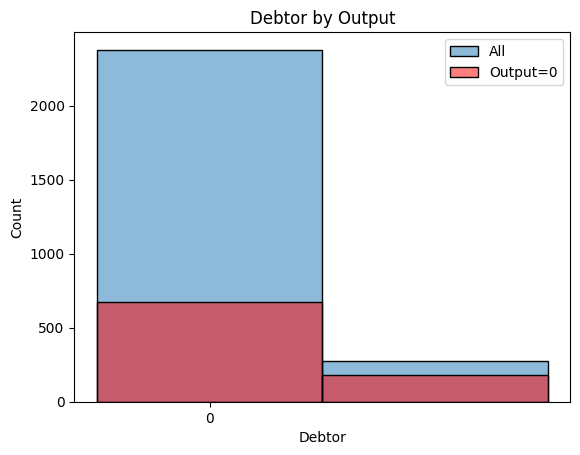

In [ ]:
sns.histplot(data=TRAIN,
             x="Debtor",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Debtor",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Debtor by Output")
plt.xlabel("Debtor")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

In [ ]:
# 'Debtor'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Debtor").size()

# 각 'Debtor' 범주별 전체 카운트
total_counts = TRAIN.groupby("Debtor").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

,Total Count,Output=0 Count,Output=0 Ratio
Debtor,,,
1.0,277,178,0.642599
0.0,2377,675,0.283971


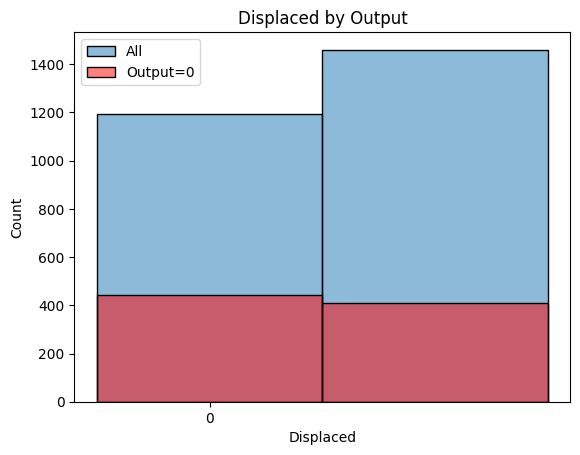

,Total Count,Output=0 Count,Output=0 Ratio
1.0,277,410,1.480144
0.0,2377,443,0.186369


In [ ]:
sns.histplot(data=TRAIN,
             x="Displaced",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Displaced",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Displaced by Output")
plt.xlabel("Displaced")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Displaced'별로 그룹화하고, 각 그룹 내 'Target'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Displaced").size()

# 각 'Displaced' 범주별 전체 카운트
output_counts = TRAIN.groupby("Displaced").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

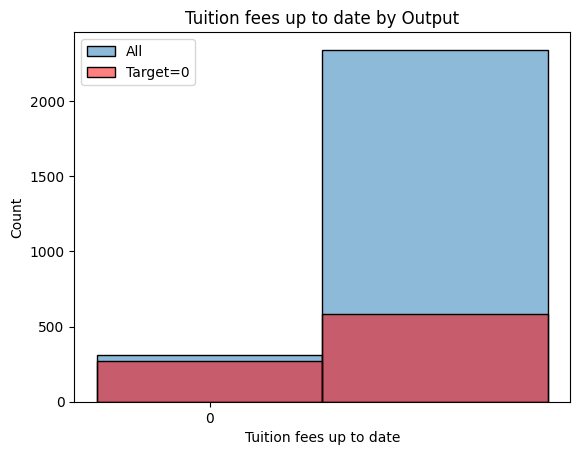

,Total Count,Output=0 Count,Output=0 Ratio
1.0,2222.0,582.0,0.261926
0.0,NaN,271.0,NaN
2.0,19.0,NaN,NaN
3.0,77.0,NaN,NaN
4.0,4.0,NaN,NaN
5.0,1.0,NaN,NaN
6.0,8.0,NaN,NaN
7.0,7.0,NaN,NaN
8.0,4.0,NaN,NaN
9.0,27.0,NaN,NaN


In [ ]:
sns.histplot(data=TRAIN,
             x="Tuition fees up to date",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Tuition fees up to date",
             color='red',
             label="Target=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Tuition fees up to date by Output")
plt.xlabel("Tuition fees up to date")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Tuition fees up to date'별로 그룹화하고, 각 그룹 내 'Target'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Tuition fees up to date").size()

# 각 'Tuition fees up to date' 범주별 전체 카운트
output_counts = TRAIN.groupby("Displaced").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

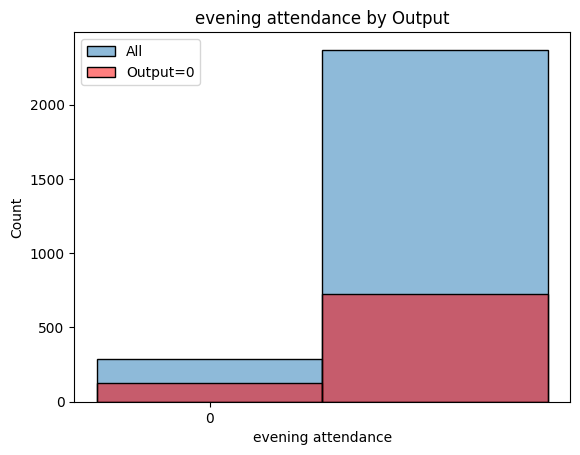

,Total Count,Output=0 Count,Output=0 Ratio
1.0,2222.0,727.0,0.327183
0.0,NaN,126.0,NaN
2.0,19.0,NaN,NaN
3.0,77.0,NaN,NaN
4.0,4.0,NaN,NaN
5.0,1.0,NaN,NaN
6.0,8.0,NaN,NaN
7.0,7.0,NaN,NaN
8.0,4.0,NaN,NaN
9.0,27.0,NaN,NaN


In [ ]:
sns.histplot(data=TRAIN,
             x="evening attendance",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="evening attendance",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("evening attendance by Output")
plt.xlabel("evening attendance")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'evening attendance'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("evening attendance").size()

# 각 'evening attendance' 범주별 전체 카운트
output_counts = TRAIN.groupby("evening attendance").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

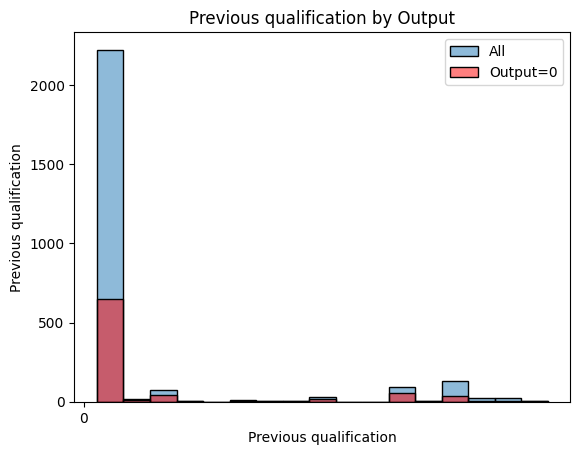

,Total Count,Output=0 Count,Output=0 Ratio
2.0,1.0,13.0,13.000000
12.0,7.0,58.0,8.285714
15.0,1.0,7.0,7.000000
3.0,11.0,45.0,4.090909
6.0,1.0,3.0,3.000000
16.0,2.0,6.0,3.000000
9.0,7.0,15.0,2.142857
17.0,1.0,2.0,2.000000
14.0,21.0,38.0,1.809524
8.0,2.0,3.0,1.500000


In [ ]:
sns.histplot(data=TRAIN,
             x="Previous qualification",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Previous qualification",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Previous qualification by Output")
plt.xlabel("Previous qualification")
plt.ylabel("Previous qualification")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Previous qualification'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Previous qualification").size()

# 각 'Previous qualification' 범주별 전체 카운트
total_counts = TRAIN.groupby("Nacionality").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

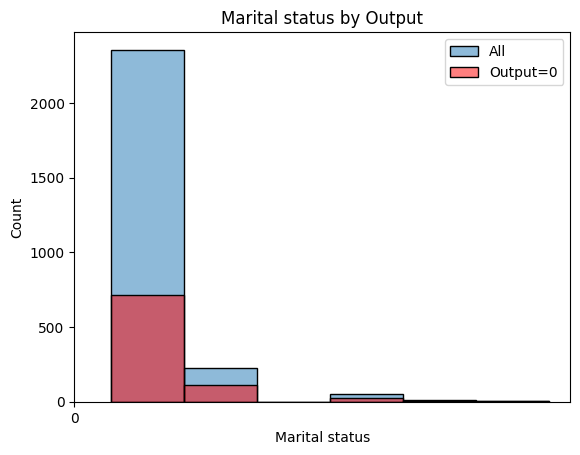

,Total Count,Output=0 Count,Output=0 Ratio
2.0,1,110.0,110.000000
4.0,3,24.0,8.000000
5.0,1,4.0,4.000000
6.0,1,2.0,2.000000
1.0,2591,712.0,0.274797
3.0,11,1.0,0.090909
8.0,2,NaN,NaN
9.0,7,NaN,NaN
10.0,2,NaN,NaN
12.0,7,NaN,NaN


In [ ]:
sns.histplot(data=TRAIN,
             x="Marital status",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Marital status",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Marital status by Output")
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Marital status'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Marital status").size()

# 각 'Marital status' 범주별 전체 카운트
output_counts = TRAIN.groupby("Marital status").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

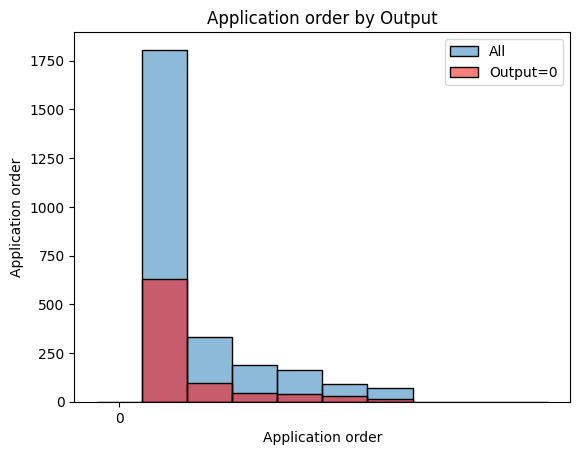

,Total Count,Output=0 Count,Output=0 Ratio
Application order,,,
1.0,1806,629.0,0.348283
5.0,90,29.0,0.322222
2.0,332,96.0,0.289157
3.0,189,46.0,0.243386
4.0,165,40.0,0.242424
6.0,70,13.0,0.185714
0.0,1,NaN,NaN
9.0,1,NaN,NaN


In [ ]:
sns.histplot(data=TRAIN,
             x="Application order",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Application order",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Application order by Output")
plt.xlabel("Application order")
plt.ylabel("Application order")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Application order'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Application order").size()

# 각 'Application order' 범주별 전체 카운트
total_counts = TRAIN.groupby("Application order").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

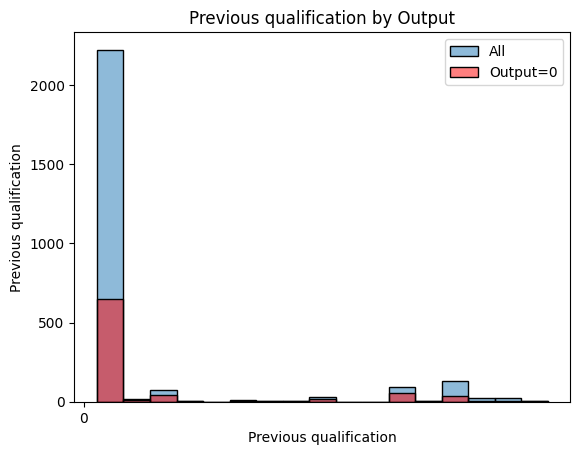

,Total Count,Output=0 Count,Output=0 Ratio
Previous qualification,,,
5.0,1,1.0,1.000000
7.0,7,7.0,1.000000
10.0,1,1.0,1.000000
8.0,4,3.0,0.750000
2.0,19,13.0,0.684211
12.0,92,58.0,0.630435
3.0,77,45.0,0.584416
9.0,27,15.0,0.555556
4.0,4,2.0,0.500000


In [ ]:
sns.histplot(data=TRAIN,
             x="Previous qualification",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Previous qualification",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Previous qualification by Output")
plt.xlabel("Previous qualification")
plt.ylabel("Previous qualification")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Previous qualification'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Previous qualification").size()

# 각 'Previous qualification' 범주별 전체 카운트
total_counts = TRAIN.groupby("Previous qualification").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

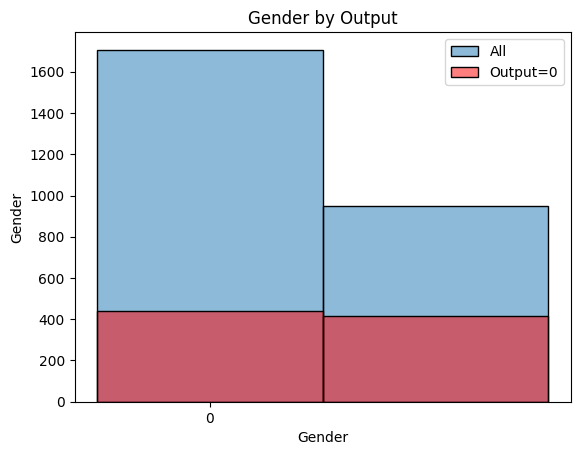

,Total Count,Output=0 Count,Output=0 Ratio
Gender,,,
1.0,947,414,0.437170
0.0,1707,439,0.257176


In [ ]:
sns.histplot(data=TRAIN,
             x="Gender",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Gender",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Gender by Output")
plt.xlabel("Gender")
plt.ylabel("Gender")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Gender'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Gender").size()

# 각 'Gender' 범주별 전체 카운트
total_counts = TRAIN.groupby("Gender").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

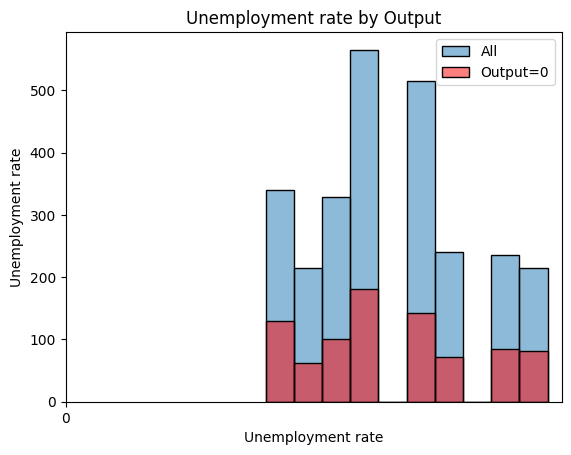

,Total Count,Output=0 Count,Output=0 Ratio
Unemployment rate,,,
7.6,340,129,0.379412
16.2,215,81,0.376744
15.5,236,85,0.360169
10.8,323,110,0.340557
12.7,244,79,0.323770
9.4,329,101,0.306991
13.9,240,71,0.295833
11.1,242,71,0.293388
8.9,215,62,0.288372


In [ ]:
sns.histplot(data=TRAIN,
             x="Unemployment rate",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Unemployment rate",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Unemployment rate by Output")
plt.xlabel("Unemployment rate")
plt.ylabel("Unemployment rate")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Unemployment rate'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Unemployment rate").size()

# 각 'Unemployment rate' 범주별 전체 카운트
total_counts = TRAIN.groupby("Unemployment rate").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

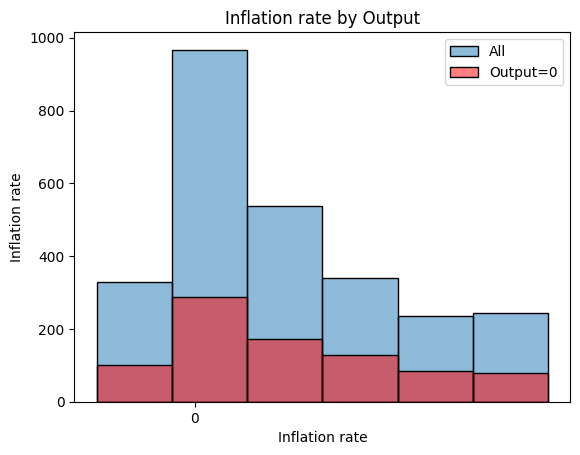

,Total Count,Output=0 Count,Output=0 Ratio
Inflation rate,,,
2.6,340,129,0.379412
0.3,215,81,0.376744
2.8,236,85,0.360169
3.7,244,79,0.323770
1.4,538,172,0.319703
-0.8,329,101,0.306991
-0.3,240,71,0.295833
0.6,242,71,0.293388
0.5,270,64,0.237037


In [ ]:
sns.histplot(data=TRAIN,
             x="Inflation rate",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Inflation rate",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Inflation rate by Output")
plt.xlabel("Inflation rate")
plt.ylabel("Inflation rate")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Inflation rate'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Inflation rate").size()

# 각 'Inflation rate' 범주별 전체 카운트
total_counts = TRAIN.groupby("Inflation rate").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

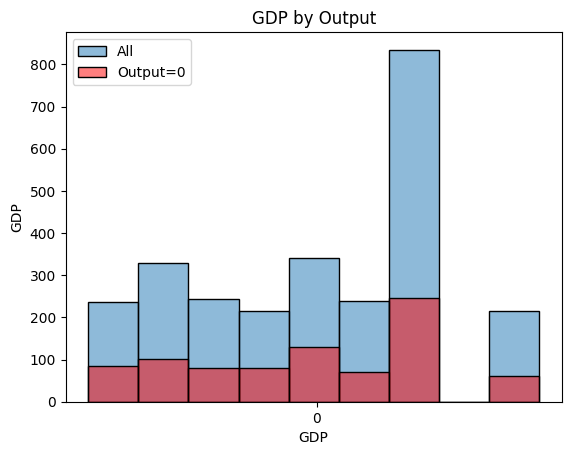

,Total Count,Output=0 Count,Output=0 Ratio
GDP,,,
0.32,340,129,0.379412
-0.92,215,81,0.376744
-4.06,236,85,0.360169
1.74,323,110,0.340557
-1.70,244,79,0.323770
-3.12,329,101,0.306991
0.79,240,71,0.295833
2.02,242,71,0.293388
3.51,215,62,0.288372


In [ ]:
sns.histplot(data=TRAIN,
             x="GDP",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="GDP",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("GDP by Output")
plt.xlabel("GDP")
plt.ylabel("GDP")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'GDP'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("GDP").size()

# 각 'GDP' 범주별 전체 카운트
total_counts = TRAIN.groupby("GDP").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

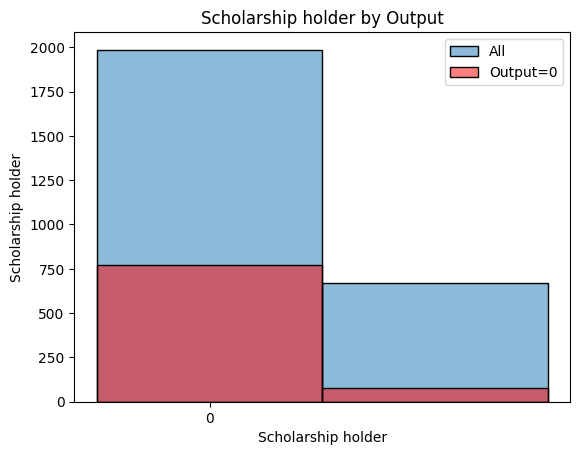

,Total Count,Output=0 Count,Output=0 Ratio
Scholarship holder,,,
0.0,1986,774,0.389728
1.0,668,79,0.118263


In [ ]:
sns.histplot(data=TRAIN,
             x="Scholarship holder",
             label="All",
             kde=False,
             alpha=0.5,
             discrete=True)

sns.histplot(data=TRAIN[TRAIN['Output']==0],
             x="Scholarship holder",
             color='red',
             label="Output=0",
             kde=False,
             alpha=0.5,
             discrete=True)

plt.title("Scholarship holder by Output")
plt.xlabel("Scholarship holder")
plt.ylabel("Scholarship holder")
plt.xticks(ticks=np.arange(0, 1), labels=np.arange(0, 1))

plt.legend()
plt.show()

# 'Scholarship holder'별로 그룹화하고, 각 그룹 내 'Output'의 값이 0인 경우의 수를 계산
output_0_counts = TRAIN[TRAIN['Output'] == 0].groupby("Scholarship holder").size()

# 각 'Scholarship holder' 범주별 전체 카운트
total_counts = TRAIN.groupby("Scholarship holder").size()

# 'Output=0' 비율 계산
output_0_ratio = output_0_counts / total_counts

# 결과를 데이터프레임에 추가
results_df = pd.DataFrame({
    'Total Count': total_counts,
    'Output=0 Count': output_0_counts,
    'Output=0 Ratio': output_0_ratio
})

# 비율을 기준으로 내림차순 정렬
results_df.sort_values(by='Output=0 Ratio',
                       ascending=False,
                       inplace=True)

# 결과 출력
results_df

# Prediction Model




In [ ]:
df = TRAIN.copy()


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedShuffleSplit

X, y = df.drop('Output', axis=1), df['Output']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


model_single = DecisionTreeClassifier(random_state=42).fit(
    X_train, y_train
)

model_bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42), # Weak Learner의 인스턴스
    n_estimators=100, # 훈련시킬 Weak Learner의 개수
    bootstrap=True, # Bootstrap 적용 여부; True 라면 복원 추출이 된다.
    max_samples=0.5, # Weak Learner를 훈련시킬 때 사용할 데이터의 수; 전체 중 50%의 데이터를 추출한다.
    random_state=42
).fit(
    X_train, y_train
)

## Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


model_pasting = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42), # Weak Learner의 인스턴스
    n_estimators=100, # 훈련시킬 Weak Learner의 개수
    bootstrap=False, # Bootstrap 적용 여부; False 라면 비복원 추출이 된다.
    max_samples=0.5, # Weak Learner를 훈련시킬 때 사용할 데이터의 수; 전체 중 50%의 데이터를 추출한다.
    random_state=42
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Pasting: ', accuracy_score(y_train, model_pasting.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Pasting: ', accuracy_score(y_test, model_pasting.predict(X_test)))

# Training performance
- Single:  1.0
- Pasting:  0.9924609585352719
# Validation performance
- Single:  0.6599749058971142
- Pasting:  0.7478042659974906


## Random Subspace

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


model_rs = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42), # Weak Learner의 인스턴스
    n_estimators=100, # 훈련시킬 Weak Learner의 개수
    bootstrap=False, # Bootstrap 적용 여부; False 라면 복원 추출이 된다.
    max_samples=1.0, # Weak Learner를 훈련시킬 때 사용할 데이터의 수; 전체 데이터를 다 활용한다.
    max_features=0.5, # 원본 데이터의 특성값들 중 반만 사용해보자
    random_state=42
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Random Subspace: ', accuracy_score(y_train, model_rs.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Random Subspace: ', accuracy_score(y_test, model_rs.predict(X_test)))

# Training performance
- Single:  1.0
- Random Subspace:  1.0
# Validation performance
- Single:  0.6599749058971142
- Random Subspace:  0.7590966122961104


## Random Patch

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


model_rp = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42), # Weak Learner의 인스턴스
    n_estimators=100, # 훈련시킬 Weak Learner의 개수
    bootstrap=True, # 샘플에 대한 Bootstrap 적용 여부; True 라면 비복원 추출이 된다.
    bootstrap_features=True, # 특성값에 대한 Bootstrap 적용 여부; True 라면 비복원 추출이 된다.
    max_samples=0.5, # Weak Learner를 훈련시킬 때 사용할 데이터의 수; 50%의 데이터만 활용한다.
    max_features=0.5, # 원본 데이터의 특성값들 중 반만 사용해보자
    random_state=42
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Random Patch: ', accuracy_score(y_train, model_rp.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Random Patch: ', accuracy_score(y_test, model_rp.predict(X_test)))

# Training performance
- Single:  1.0
- Random Patch:  0.9752288637587506
# Validation performance
- Single:  0.6599749058971142
- Random Patch:  0.7415307402760352


## Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


model_hard_voting = VotingClassifier(
    estimators = [
        ('svc-rbf', SVC(kernel='rbf', probability=True, random_state=42)),
        ('svc-poly', SVC(kernel='poly', probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ], # 일반적인 학습 모델들
    voting='hard' # Hard Voting
).fit(
    X_train, y_train
)

model_soft_voting = VotingClassifier(
    estimators = [
        ('svc-rbf', SVC(kernel='rbf', probability=True, random_state=42)),
        ('svc-poly', SVC(kernel='poly', probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ], # 일반적인 학습 모델들
    voting='soft' # Soft Voting
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Hard Voting: ', accuracy_score(y_train, model_hard_voting.predict(X_train)))
print('- Soft Voting: ', accuracy_score(y_train, model_soft_voting.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Hard Voting: ', accuracy_score(y_test, model_hard_voting.predict(X_test)))
print('- Soft Voting: ', accuracy_score(y_test, model_soft_voting.predict(X_test)))

# Training performance
- Single:  1.0
- Hard Voting:  0.7845988152934841
- Soft Voting:  0.9278406031233172
# Validation performance
- Single:  0.6599749058971142
- Hard Voting:  0.7239648682559598
- Soft Voting:  0.7227101631116688


## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


model_stack = StackingClassifier(
    estimators = [
        ('svc-rbf', SVC(kernel='rbf', probability=True, random_state=42)),
        ('svc-poly', SVC(kernel='poly', probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ], # 일반적인 학습 모델들
    final_estimator=LogisticRegression(random_state=42) # Meta-learner
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Stacking: ', accuracy_score(y_train, model_stack.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Stacking: ', accuracy_score(y_test, model_stack.predict(X_test)))

# Training performance
- Single:  1.0
- Stacking:  0.8163704900376952
# Validation performance
- Single:  0.6599749058971142
- Stacking:  0.7452948557089084


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


model_gb = GradientBoostingClassifier(
    n_estimators=100, # 최대 100개의 Decision Tree를 만들 것이다. 하지만, 중간에 Loss가 0가 된다면, 더 이상 Decision Tree를 생성하지 않고 훈련이 종료된다.
    learning_rate=0.1, # 각 Decision Tree가 결과에 미치는 영향을 나타낸다(Shrinkage). 과대적합을 막기 위해서 낮은 값으로 설정해보자
    subsample=0.8, # 각 Decision Tree 훈련에 사용할 샘플의 개수를 나타낸다. 80%만 활용해보자.
    max_depth=3, # Decision Tree의 깊이를 나타낸다. 많이 깊어지지 않도록 해보자.
    min_samples_leaf=1, # Decision Tree의 잎 노드에 필요한 샘플의 개수를 나타낸다. 깊이를 조절했으므로, 이건 그냥 1로 놔두자.
    max_features=1.0, # Random Subspace의 적용을 나타낸다. 전체 Feature를 다 사용하자.
    random_state=42
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Gradient Boosting: ', accuracy_score(y_train, model_gb.predict(X_train)))

print('# Validation performance')
print('- Gradient Boosting: ', accuracy_score(y_test, model_gb.predict(X_test)))

# Training performance
- Gradient Boosting:  0.8712977921378567
# Validation performance
- Gradient Boosting:  0.7628607277289837


## XGBoost

In [ ]:
from xgboost import XGBClassifier


model_xgb = XGBClassifier(
    n_estimators=100, # 최대 100개의 Decision Tree를 만들 것이다. 하지만, 중간에 Loss가 0가 된다면, 더 이상 Decision Tree를 생성하지 않고 훈련이 종료된다.
    learning_rate=0.1, # 각 Decision Tree가 결과에 미치는 영향을 나타낸다(Shrinkage). 과대적합을 막기 위해서 낮은 값으로 설정해보자
    subsample=0.8, # 각 Decision Tree 훈련에 사용할 샘플의 개수를 나타낸다. 80%만 활용해보자.
    max_depth=3, # Decision Tree의 깊이를 나타낸다. 많이 깊어지지 않도록 해보자.
    random_state=42
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- XGBoost: ', accuracy_score(y_train, model_xgb.predict(X_train)))

print('# Validation performance')
print('- XGBoost: ', accuracy_score(y_test, model_xgb.predict(X_test)))

# Training performance
- XGBoost:  0.8443726440495423
# Validation performance
- XGBoost:  0.7641154328732748


## Light GBM

In [ ]:
from lightgbm import LGBMClassifier


model_lgbm = LGBMClassifier(
    n_estimators=100, # 최대 100개의 Decision Tree를 만들 것이다. 하지만, 중간에 Loss가 0가 된다면, 더 이상 Decision Tree를 생성하지 않고 훈련이 종료된다.
    learning_rate=0.1, # 각 Decision Tree가 결과에 미치는 영향을 나타낸다(Shrinkage). 과대적합을 막기 위해서 낮은 값으로 설정해보자
    subsample=0.8, # 각 Decision Tree 훈련에 사용할 샘플의 개수를 나타낸다. 80%만 활용해보자.
    max_depth=3, # Decision Tree의 깊이를 나타낸다. 많이 깊어지지 않도록 해보자.
    random_state=42,
    verbosity=-1
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Light GBM: ', accuracy_score(y_train, model_lgbm.predict(X_train)))

print('# Validation performance')
print('- Light GBM: ', accuracy_score(y_test, model_lgbm.predict(X_test)))

# Training performance
- Light GBM:  0.8540656973613355
# Validation performance
- Light GBM:  0.7616060225846926


## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42), # 깊이 1의 Decision Tree, 즉 Stump를 활용한다. 기본값이 이렇게 설정되어 있다.
    n_estimators=100, # 최대 100개의 Stump를 만들 것이다. 하지만, 중간에 Loss가 0가 된다면, 더 이상 Stump를 생성하지 않고 훈련이 종료된다.
    learning_rate=1.0, # 각 Stump가 미치는 영향을 나타낸다. 일단은 기본값으로 설정하자.
    random_state=42
).fit(
    X_train, y_train
)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Ada Boost: ', accuracy_score(y_train, model_ab.predict(X_train)))

print('# Validation performance')
print('- Ada Boost: ', accuracy_score(y_test, model_ab.predict(X_test)))

# Training performance
- Ada Boost:  0.7722132471728594
# Validation performance
- Ada Boost:  0.7465495608531995


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    max_features='sqrt',
    max_samples=0.5, # 전체 훈련 샘플 중 50%만 Bootstrap한다
    random_state=42
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Random Forest: ', accuracy_score(y_train, model_rf.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Random Forest: ', accuracy_score(y_test, model_rf.predict(X_test)))

# Training performance
- Single:  1.0
- Random Forest:  0.7754442649434572
# Validation performance
- Single:  0.6599749058971142
- Random Forest:  0.7452948557089084


## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


model_et = RandomForestClassifier(
    n_estimators=100, # 500개의 Decision Tree를 만든다
    max_depth=5, # 각 Decision Tree의 깊이는 5로 제한한다
    max_features='sqrt', # 30개의 특성값 공간 중 약 5개만 사용한다
    max_samples=0.5, # 전체 훈련 샘플 중 50%만 Bootstrap한다
    random_state=42
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Extra Trees: ', accuracy_score(y_train, model_et.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Extra Trees: ', accuracy_score(y_test, model_et.predict(X_test)))

# Training performance
- Single:  1.0
- Extra Trees:  0.7754442649434572
# Validation performance
- Single:  0.6599749058971142
- Extra Trees:  0.7452948557089084


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(
    fit_intercept=False
).fit(
    X_train, y_train
)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Logistic Regression: ', accuracy_score(y_train, model_lr.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Logistic Regression: ', accuracy_score(y_test, model_lr.predict(X_test)))

# Training performance
- Single:  1.0
- Logistic Regression:  0.7743672590199246
# Validation performance
- Single:  0.6599749058971142
- Logistic Regression:  0.7703889585947302


## Decision Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier(random_state=0)

model_dt = DecisionTreeClassifier(
    random_state=0
).fit(
    X_train,y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Decision Tree: ', accuracy_score(y_train, model_dt.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Decision Tree: ', accuracy_score(y_test, model_dt.predict(X_test)))

# Training performance
- Single:  1.0
- Decision Tree:  1.0
# Validation performance
- Single:  0.6599749058971142
- Decision Tree:  0.6624843161856964


## Sub-Vector Machine

In [ ]:
from sklearn import svm

model_svm = svm.SVC(
    kernel='linear',
    probability=True
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- Sub-Vector Machine: ', accuracy_score(y_train, model_svm.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- Sub-Vector Machine: ', accuracy_score(y_test, model_svm.predict(X_test)))

# Training performance
- Single:  1.0
- Sub-Vector Machine:  0.782444803446419
# Validation performance
- Single:  0.6599749058971142
- Sub-Vector Machine:  0.7653701380175659


## XG Boost Logistic Regression

In [ ]:
from xgboost import XGBClassifier

model_xgb_log = XGBClassifier(
    objective='binary:logistic',
    n_estimators=1000,
    learning_rate=0.1,
    subsample=0.8,
    max_depth=3,
    random_state=42
).fit(
    X_train, y_train
)

In [ ]:
from sklearn.metrics import accuracy_score


print('# Training performance')
print('- Single: ', accuracy_score(y_train, model_single.predict(X_train)))
print('- XG Boost Logistic Regression: ', accuracy_score(y_train, model_xgb_log.predict(X_train)))

print('# Validation performance')
print('- Single: ', accuracy_score(y_test, model_single.predict(X_test)))
print('- XG Boost Logistic Regression: ', accuracy_score(y_test, model_xgb_log.predict(X_test)))

# Training performance
- Single:  1.0
- XG Boost Logistic Regression:  0.9994614970382337
# Validation performance
- Single:  0.6599749058971142
- XG Boost Logistic Regression:  0.7528230865746549


## Ensemble Learning

In [ ]:
print('# Performance')
print('- Decision Tree: ', accuracy_score(y_test, model_dt.predict(X_test)))
print('- Random Forest: ', accuracy_score(y_test, model_rf.predict(X_test)))
print('- Extra Tree: ', accuracy_score(y_test, model_et.predict(X_test)))
print('- Logistic Regression: ', accuracy_score(y_test, model_lr.predict(X_test)))
print('- Gradient Boosting: ', accuracy_score(y_test, model_gb.predict(X_test)))
print('- Ada Boost: ', accuracy_score(y_test, model_ab.predict(X_test)))
print('- XG Boost: ', accuracy_score(y_test, model_xgb.predict(X_test)))
print('- Light GBM: ', accuracy_score(y_test, model_lgbm.predict(X_test)))
print('- SVM: ', accuracy_score(y_test, model_svm.predict(X_test)))

# Performance
- Decision Tree:  0.6624843161856964
- Random Forest:  0.7452948557089084
- Extra Tree:  0.7452948557089084
- Logistic Regression:  0.7703889585947302
- Gradient Boosting:  0.7628607277289837
- Ada Boost:  0.7465495608531995
- XG Boost:  0.7641154328732748
- Light GBM:  0.7616060225846926
- SVM:  0.7653701380175659


In [ ]:
ens1 = VotingClassifier(estimators=[('model_rf', model_rf), ('model_lr', model_lr), ('model_ab',model_ab), ('model_xgb',model_xgb)], voting='soft')
ens1.fit(X_train, y_train)

y_pred = ens1.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 77.16 %


In [ ]:
ens2 = VotingClassifier(estimators=[('model_rf', model_rf), ('model_lr', model_lr), ('model_ab',model_ab), ('model_xgb',model_xgb)], voting='hard')
ens2.fit(X_train, y_train)

y_pred = ens2.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 77.29 %


In [ ]:
ens3 = VotingClassifier(estimators=[('model_rf', model_rf), ('model_lr', model_lr), ('model_svm',model_svm), ('model_ab',model_ab),('model_xgb',model_xgb)], voting='soft')
ens3.fit(X_train, y_train)

y_pred = ens3.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 77.42 %


In [ ]:
ens4 = VotingClassifier(estimators=[('model_rf', model_rf), ('model_lr', model_lr), ('model_svm',model_svm), ('model_ab',model_ab), ('model_xgb',model_xgb)], voting='hard')
ens4.fit(X_train, y_train)

y_pred = ens4.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 76.54 %


# Feature Selection

In [ ]:
!pip install statsmodels

### Variance based Method

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

X = TRAIN.drop('Output', axis=1)
selector = VarianceThreshold(
    threshold = 0.8 # 0.8보다 작은 분산을 가진 특성값은 제거한다.
).fit(X)

pd.DataFrame({
    'feature': selector.feature_names_in_,
    'variance': np.round(selector.variances_, 3),
})

,feature,variance
0,Marital status,0.336
1,Application mode,28.166
2,Application order,1.671
3,Course,19.046
4,evening attendance,0.096
5,Previous qualification,15.924
6,Nacionality,2.610
7,Mother's qualification,80.801
8,Father's qualification,120.728
9,Mother's occupation,14.336


In [ ]:
import pandas as pd


pd.DataFrame(
    selector.transform(X),
    columns=selector.get_feature_names_out()
)

,Application mode,Application order,Course,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Age at enrollment,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,1.0,1.0,15.0,1.0,1.0,2.0,3.0,4.0,4.0,25.0,...,6.0,11.571429,0.0,6.0,9.0,6.0,11.571429,15.5,2.8,-4.06
1,16.0,1.0,5.0,1.0,1.0,23.0,28.0,10.0,10.0,21.0,...,5.0,13.200000,4.0,12.0,12.0,4.0,13.500000,8.9,1.4,3.51
2,7.0,2.0,12.0,1.0,1.0,2.0,28.0,5.0,10.0,19.0,...,7.0,12.600000,0.0,8.0,12.0,7.0,12.600000,10.8,1.4,1.74
3,8.0,5.0,15.0,1.0,1.0,23.0,28.0,29.0,39.0,19.0,...,5.0,11.600000,0.0,6.0,6.0,6.0,12.500000,8.9,1.4,3.51
4,1.0,1.0,11.0,1.0,1.0,22.0,27.0,4.0,4.0,19.0,...,6.0,11.000000,0.0,6.0,6.0,5.0,12.200000,11.1,0.6,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,12.0,1.0,6.0,1.0,1.0,22.0,27.0,12.0,11.0,34.0,...,0.0,0.000000,0.0,6.0,0.0,0.0,0.000000,10.8,1.4,1.74
2650,8.0,2.0,16.0,1.0,1.0,13.0,28.0,4.0,4.0,19.0,...,6.0,13.666667,0.0,7.0,9.0,6.0,12.500000,12.4,0.5,1.79
2651,1.0,1.0,10.0,1.0,1.0,22.0,28.0,10.0,10.0,19.0,...,5.0,10.600000,0.0,6.0,8.0,5.0,11.000000,10.8,1.4,1.74
2652,8.0,3.0,9.0,1.0,1.0,22.0,27.0,7.0,6.0,18.0,...,5.0,12.750000,0.0,5.0,7.0,5.0,11.500000,13.9,-0.3,0.79


### Multicollinearity-based Method

#### Pairwise Correlation

In [ ]:
from itertools import combinations
import scipy.stats as st

X = TRAIN.drop('Output', axis=1)
for a, b in combinations(X.columns, 2): # 서로 다른 특성값 2개를 뽑는 조합이다.
    res = st.pearsonr(X[a], X[b])
    r, p = res.statistic, res.pvalue
    print(f'{a} - {b}: {r:.2f} (p-value = {p:.2f})')

Marital status - Application mode: 0.22 (p-value = 0.00)
Marital status - Application order: -0.12 (p-value = 0.00)
Marital status - Course: 0.01 (p-value = 0.46)
Marital status - evening attendance: -0.25 (p-value = 0.00)
Marital status - Previous qualification: 0.14 (p-value = 0.00)
Marital status - Nacionality: -0.03 (p-value = 0.13)
Marital status - Mother's qualification: 0.20 (p-value = 0.00)
Marital status - Father's qualification: 0.14 (p-value = 0.00)
Marital status - Mother's occupation: 0.07 (p-value = 0.00)
Marital status - Father's occupation: 0.02 (p-value = 0.33)
Marital status - Displaced: -0.24 (p-value = 0.00)
Marital status - Educational special needs: -0.03 (p-value = 0.19)
Marital status - Debtor: 0.04 (p-value = 0.05)
Marital status - Tuition fees up to date: -0.07 (p-value = 0.00)
Marital status - Gender: -0.02 (p-value = 0.26)
Marital status - Scholarship holder: -0.06 (p-value = 0.00)
Marital status - Age at enrollment: 0.55 (p-value = 0.00)
Marital status - In

In [ ]:
from itertools import combinations
import scipy.stats as st

removed = set() # 강한 상관 관계가 있는 특성값을 여기에 저장하자.
X = TRAIN.drop('Output', axis=1)
for a, b in combinations(X.columns, 2): # 서로 다른 특성값 2개를 뽑는 조합이다.
    res = st.pearsonr(X[a], X[b])
    r, p = res.statistic, res.pvalue
    if r >= 0.7 and p < 0.05:
        print(f'{a} - {b}: {r:.2f} (p-value = {p:.2f})')
        removed.add(a)

Nacionality - International: 0.89 (p-value = 0.00)
Mother's occupation - Father's occupation: 0.70 (p-value = 0.00)
Curricular units 1st sem (credited) - Curricular units 1st sem (enrolled): 0.77 (p-value = 0.00)
Curricular units 1st sem (credited) - Curricular units 2nd sem (credited): 0.95 (p-value = 0.00)
Curricular units 1st sem (enrolled) - Curricular units 1st sem (approved): 0.78 (p-value = 0.00)
Curricular units 1st sem (enrolled) - Curricular units 2nd sem (credited): 0.76 (p-value = 0.00)
Curricular units 1st sem (enrolled) - Curricular units 2nd sem (enrolled): 0.95 (p-value = 0.00)
Curricular units 1st sem (evaluations) - Curricular units 2nd sem (evaluations): 0.79 (p-value = 0.00)
Curricular units 1st sem (approved) - Curricular units 2nd sem (enrolled): 0.74 (p-value = 0.00)
Curricular units 1st sem (approved) - Curricular units 2nd sem (approved): 0.90 (p-value = 0.00)
Curricular units 1st sem (grade) - Curricular units 2nd sem (grade): 0.84 (p-value = 0.00)
Curricular 

In [ ]:
removed

{'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (enrolled)',
 "Mother's occupation",
 'Nacionality'}

In [ ]:
X.drop(removed, axis=1)

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Mother's qualification,Father's qualification,Father's occupation,Displaced,...,Age at enrollment,International,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
id,,,,,,,,,,,,,,,,,,,,,
3207.0,1.0,1.0,1.0,15.0,1.0,1.0,2.0,3.0,4.0,1.0,...,25.0,0.0,0.0,0.0,9.0,11.571429,0.0,15.5,2.8,-4.06
3731.0,1.0,16.0,1.0,5.0,1.0,1.0,23.0,28.0,10.0,1.0,...,21.0,0.0,0.0,4.0,12.0,13.500000,0.0,8.9,1.4,3.51
884.0,1.0,7.0,2.0,12.0,1.0,1.0,2.0,28.0,10.0,1.0,...,19.0,0.0,0.0,0.0,12.0,12.600000,0.0,10.8,1.4,1.74
1394.0,1.0,8.0,5.0,15.0,1.0,1.0,23.0,28.0,39.0,1.0,...,19.0,0.0,0.0,0.0,6.0,12.500000,0.0,8.9,1.4,3.51
2659.0,1.0,1.0,1.0,11.0,1.0,1.0,22.0,27.0,4.0,0.0,...,19.0,0.0,0.0,0.0,6.0,12.200000,0.0,11.1,0.6,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005.0,2.0,12.0,1.0,6.0,1.0,1.0,22.0,27.0,11.0,0.0,...,34.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1285.0,1.0,8.0,2.0,16.0,1.0,1.0,13.0,28.0,4.0,1.0,...,19.0,0.0,0.0,0.0,9.0,12.500000,0.0,12.4,0.5,1.79
1127.0,1.0,1.0,1.0,10.0,1.0,1.0,22.0,28.0,10.0,1.0,...,19.0,0.0,0.0,0.0,8.0,11.000000,0.0,10.8,1.4,1.74


#### Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = TRAIN.drop('Output', axis=1)
for i in range(len(X.columns)):
    vif = variance_inflation_factor(X, i)
    print(f'{X.columns[i]}: {vif:.2f}')

Marital status: 7.52
Application mode: 4.27
Application order: 3.33
Course: 7.56
evening attendance: 10.46
Previous qualification: 1.87
Nacionality: 7.16
Mother's qualification: 4.58
Father's qualification: 4.65
Mother's occupation: 10.53
Father's occupation: 7.93
Displaced: 2.75
Educational special needs: 1.02
Debtor: 1.41
Tuition fees up to date: 10.22
Gender: 1.79
Scholarship holder: 1.57
Age at enrollment: 19.79
International: 4.71
Curricular units 1st sem (credited): 19.07
Curricular units 1st sem (enrolled): 163.57
Curricular units 1st sem (evaluations): 19.89
Curricular units 1st sem (approved): 44.14
Curricular units 1st sem (grade): 30.05
Curricular units 1st sem (without evaluations): 1.78
Curricular units 2nd sem (credited): 14.99
Curricular units 2nd sem (enrolled): 142.00
Curricular units 2nd sem (evaluations): 17.42
Curricular units 2nd sem (approved): 31.92
Curricular units 2nd sem (grade): 25.95
Curricular units 2nd sem (without evaluations): 1.65
Unemployment rate: 19.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

removed = set()
X = TRAIN.drop('Output', axis=1)
scaler = StandardScaler().fit(X)
X_std = pd.DataFrame(
    scaler.transform(X),
    columns=scaler.get_feature_names_out()
)

for i in range(len(X_std.columns)):
    vif = variance_inflation_factor(X_std, i)
    print(f'{X_std.columns[i]}: {vif:.2f}')
    if vif >= 10:
        removed.add(X_std.columns[i])

Marital status: 1.49
Application mode: 1.63
Application order: 1.24
Course: 1.29
evening attendance: 1.37
Previous qualification: 1.33
Nacionality: 4.68
Mother's qualification: 1.60
Father's qualification: 1.45
Mother's occupation: 2.27
Father's occupation: 2.11
Displaced: 1.31
Educational special needs: 1.01
Debtor: 1.29
Tuition fees up to date: 1.37
Gender: 1.16
Scholarship holder: 1.18
Age at enrollment: 2.30
International: 4.69
Curricular units 1st sem (credited): 17.44
Curricular units 1st sem (enrolled): 23.62
Curricular units 1st sem (evaluations): 4.09
Curricular units 1st sem (approved): 13.50
Curricular units 1st sem (grade): 5.28
Curricular units 1st sem (without evaluations): 1.71
Curricular units 2nd sem (credited): 13.85
Curricular units 2nd sem (enrolled): 16.67
Curricular units 2nd sem (evaluations): 3.50
Curricular units 2nd sem (approved): 10.40
Curricular units 2nd sem (grade): 5.57
Curricular units 2nd sem (without evaluations): 1.59
Unemployment rate: 1.28
Inflatio

In [ ]:
X.drop(removed, axis=1)

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,International,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
id,,,,,,,,,,,,,,,,,,,,,
3207.0,1.0,1.0,1.0,15.0,1.0,1.0,1.0,2.0,3.0,4.0,...,0.0,8.0,11.571429,0.0,9.0,11.571429,0.0,15.5,2.8,-4.06
3731.0,1.0,16.0,1.0,5.0,1.0,1.0,1.0,23.0,28.0,10.0,...,0.0,13.0,13.200000,0.0,12.0,13.500000,0.0,8.9,1.4,3.51
884.0,1.0,7.0,2.0,12.0,1.0,1.0,1.0,2.0,28.0,5.0,...,0.0,12.0,12.600000,0.0,12.0,12.600000,0.0,10.8,1.4,1.74
1394.0,1.0,8.0,5.0,15.0,1.0,1.0,1.0,23.0,28.0,29.0,...,0.0,6.0,11.600000,0.0,6.0,12.500000,0.0,8.9,1.4,3.51
2659.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,22.0,27.0,4.0,...,0.0,7.0,11.000000,0.0,6.0,12.200000,0.0,11.1,0.6,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005.0,2.0,12.0,1.0,6.0,1.0,1.0,1.0,22.0,27.0,12.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1285.0,1.0,8.0,2.0,16.0,1.0,1.0,1.0,13.0,28.0,4.0,...,0.0,10.0,13.666667,0.0,9.0,12.500000,0.0,12.4,0.5,1.79
1127.0,1.0,1.0,1.0,10.0,1.0,1.0,1.0,22.0,28.0,10.0,...,0.0,8.0,10.600000,0.0,8.0,11.000000,0.0,10.8,1.4,1.74


### Filter Method

#### Analysis of Variance, or ANOVA

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_classif


X, y = TRAIN.drop('Output', axis=1), TRAIN['Output']

fstat, pvalue = f_classif(X,  y)
pd.DataFrame({
    'feature': X.columns,
    'fstat': fstat,
    'pvalue': np.round(pvalue, 3)
})

,feature,fstat,pvalue
0,Marital status,10.940084,0.000
1,Application mode,69.475769,0.000
2,Application order,14.994582,0.000
3,Course,0.515449,0.597
4,evening attendance,10.754328,0.000
5,Previous qualification,8.134644,0.000
6,Nacionality,0.177897,0.837
7,Mother's qualification,6.931511,0.001
8,Father's qualification,0.931445,0.394
9,Mother's occupation,6.797758,0.001


#### $\chi^2$ Test

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

X, y = TRAIN.drop('Output', axis=1), TRAIN['Output']

encoder_X = OrdinalEncoder().fit(X)
encoder_y = LabelEncoder().fit(y)

X_enc = pd.DataFrame(
    encoder_X.transform(X),
    columns=encoder_X.get_feature_names_out()
)
y_enc = pd.Series(encoder_y.transform(y), name='class')

In [ ]:
X_enc

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.0,1.0,14.0,1.0,0.0,0.0,1.0,2.0,3.0,...,0.0,0.0,6.0,9.0,6.0,58.0,0.0,8.0,7.0,0.0
1,0.0,15.0,1.0,4.0,1.0,0.0,0.0,21.0,25.0,9.0,...,0.0,4.0,12.0,12.0,4.0,310.0,0.0,1.0,5.0,9.0
2,0.0,6.0,2.0,11.0,1.0,0.0,0.0,1.0,25.0,4.0,...,0.0,0.0,8.0,12.0,7.0,166.0,0.0,3.0,5.0,6.0
3,0.0,7.0,5.0,14.0,1.0,0.0,0.0,21.0,25.0,26.0,...,0.0,0.0,6.0,6.0,6.0,156.0,0.0,1.0,5.0,9.0
4,0.0,0.0,1.0,10.0,1.0,0.0,0.0,20.0,24.0,3.0,...,0.0,0.0,6.0,6.0,5.0,116.0,0.0,4.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,1.0,11.0,1.0,5.0,1.0,0.0,0.0,20.0,24.0,11.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,5.0,6.0
2650,0.0,7.0,2.0,15.0,1.0,0.0,0.0,12.0,25.0,3.0,...,0.0,0.0,7.0,9.0,6.0,156.0,0.0,5.0,3.0,7.0
2651,0.0,0.0,1.0,9.0,1.0,0.0,0.0,20.0,25.0,9.0,...,0.0,0.0,6.0,8.0,5.0,25.0,0.0,3.0,5.0,6.0
2652,0.0,7.0,3.0,8.0,1.0,0.0,0.0,20.0,24.0,6.0,...,0.0,0.0,5.0,7.0,5.0,54.0,0.0,7.0,1.0,5.0


In [ ]:
y_enc

0       0
1       0
2       2
3       2
4       0
       ..
2649    0
2650    0
2651    2
2652    2
2653    0
Name: class, Length: 2654, dtype: int64

In [ ]:
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np


chistat, pvalue = chi2(X_enc, y_enc)
pd.DataFrame({
    'feature': X_enc.columns,
    'chi-squared': chistat,
    'pvalue': np.round(pvalue, 3)
})

,feature,chi-squared,pvalue
0,Marital status,42.923487,0.000
1,Application mode,643.280013,0.000
2,Application order,29.048439,0.000
3,Course,2.221833,0.329
4,evening attendance,2.293713,0.318
5,Previous qualification,166.465202,0.000
6,Nacionality,3.443706,0.179
7,Mother's qualification,90.377824,0.000
8,Father's qualification,13.191985,0.001
9,Mother's occupation,27.420710,0.000


#### Wrapper Method

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel


X, y = TRAIN.drop('Output', axis=1), TRAIN['Output']
scaler = StandardScaler().fit(X)
X_std = pd.DataFrame(
    scaler.transform(X),
    columns=scaler.get_feature_names_out()
)

selector_rf = SelectFromModel(
    estimator = RandomForestClassifier(random_state=42),
    threshold='mean' # 특성값 중요도의 절대값들을 취한 후, 그 중에 평균 이상인 것만 고른다.
).fit(X, y)

selector_lr = SelectFromModel(
    estimator = LogisticRegression(random_state=42),
    threshold='mean' # 특성값 중요도의 절대값들을 취한 후, 그 중에 평균 이상인 것만 고른다.
).fit(X_std, y)

X_rf = pd.DataFrame(
    selector_rf.transform(X),
    columns=selector_rf.get_feature_names_out()
)

X_lr = pd.DataFrame(
    selector_lr.transform(X),
    columns=selector_lr.get_feature_names_out()
)

In [ ]:
X_rf

,Course,Mother's occupation,Father's occupation,Tuition fees up to date,Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,15.0,4.0,4.0,1.0,25.0,8.0,6.0,11.571429,9.0,6.0,11.571429
1,5.0,10.0,10.0,1.0,21.0,13.0,5.0,13.200000,12.0,4.0,13.500000
2,12.0,5.0,10.0,1.0,19.0,12.0,7.0,12.600000,12.0,7.0,12.600000
3,15.0,29.0,39.0,1.0,19.0,6.0,5.0,11.600000,6.0,6.0,12.500000
4,11.0,4.0,4.0,1.0,19.0,7.0,6.0,11.000000,6.0,5.0,12.200000
...,...,...,...,...,...,...,...,...,...,...,...
2649,6.0,12.0,11.0,1.0,34.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2650,16.0,4.0,4.0,1.0,19.0,10.0,6.0,13.666667,9.0,6.0,12.500000
2651,10.0,10.0,10.0,0.0,19.0,8.0,5.0,10.600000,8.0,5.0,11.000000
2652,9.0,7.0,6.0,1.0,18.0,8.0,5.0,12.750000,7.0,5.0,11.500000


In [ ]:
X_lr

,Tuition fees up to date,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,1.0,6.0,6.0,0.0,6.0,9.0,6.0,11.571429
1,1.0,12.0,5.0,4.0,12.0,12.0,4.0,13.500000
2,1.0,8.0,7.0,0.0,8.0,12.0,7.0,12.600000
3,1.0,6.0,5.0,0.0,6.0,6.0,6.0,12.500000
4,1.0,6.0,6.0,0.0,6.0,6.0,5.0,12.200000
...,...,...,...,...,...,...,...,...
2649,1.0,6.0,0.0,0.0,6.0,0.0,0.0,0.000000
2650,1.0,7.0,6.0,0.0,7.0,9.0,6.0,12.500000
2651,0.0,6.0,5.0,0.0,6.0,8.0,5.0,11.000000
2652,1.0,5.0,5.0,0.0,5.0,7.0,5.0,11.500000


# Prediction on the Test Set



학습 모델 훈련을 끝냈으니 테스트셋에 대한 예측 결과를 확인할 차례

In [ ]:
import pandas as pd

TEST = pd.read_csv('./test.csv', index_col='id')
TEST.head()

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
id,,,,,,,,,,,,,,,,,,,,,
4139.0,1.0,8.0,1.0,10.0,1.0,1.0,1.0,23.0,14.0,8.0,...,0.0,0.0,6.0,12.0,4.0,11.4,0.0,15.5,2.8,-4.06
721.0,1.0,1.0,1.0,11.0,1.0,1.0,1.0,13.0,1.0,4.0,...,0.0,0.0,6.0,9.0,6.0,12.0,0.0,11.1,0.6,2.02
2972.0,1.0,3.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,5.0,...,1.0,0.0,5.0,6.0,4.0,13.0,0.0,7.6,2.6,0.32
3211.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6,2.6,0.32
1688.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,13.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.8,1.4,1.74


사용했던 데이터와는 다르게, 예측해야하는 출력값인 quality가 없음을 확인할 수 있음. 일단, 테스트셋이 제대로 수집되어 있는지를 확인

In [ ]:
for c in TEST.columns:
    print(f'{c}: {len(TEST[c].loc[TEST[c].isnull()])}')

Marital status: 0
Application mode: 0
Application order: 0
Course: 0
evening attendance: 0
Previous qualification: 0
Nacionality: 0
Mother's qualification: 0
Father's qualification: 0
Mother's occupation: 0
Father's occupation: 0
Displaced: 0
Educational special needs: 0
Debtor: 0
Tuition fees up to date: 0
Gender: 0
Scholarship holder: 0
Age at enrollment: 0
International: 0
Curricular units 1st sem (credited): 0
Curricular units 1st sem (enrolled): 0
Curricular units 1st sem (evaluations): 0
Curricular units 1st sem (approved): 0
Curricular units 1st sem (grade): 0
Curricular units 1st sem (without evaluations): 0
Curricular units 2nd sem (credited): 0
Curricular units 2nd sem (enrolled): 0
Curricular units 2nd sem (evaluations): 0
Curricular units 2nd sem (approved): 0
Curricular units 2nd sem (grade): 0
Curricular units 2nd sem (without evaluations): 0
Unemployment rate: 0
Inflation rate: 0
GDP: 0




그 이외에는 지금까지 했던 처리 과정을 테스트셋에 대해 반복함
* 분포가 치우친 데이터에 대한 Log 적용
* 새로운 특성값 생성
* 범주형 데이터에 대한 인코딩
* 수치형 데이터에 대한 표준화

In [ ]:
import numpy as np
import pandas as pd

y_test_pred = ens2.predict(TEST)
y_test_pred

array([1., 2., 2., ..., 2., 0., 2.])

# Submission

* 제출물
  * 테스트셋 예측 결과를 Kaggle에 업로드
  * Jupyter Notebook 파일(.ipynb)을 이루리에 업로드

* 제출 마감
  * 24.04.17 23:59


## Kaggle에 예측 결과 업로드

제출 형식은 id 값과 그에 상응하는 출력값(Competition - [Data](https://www.kaggle.com/competitions/2024-knu-ml-ind-asmt1/data)의 **sample_submission.csv** 참조)이므로 다음과 같이 데이터를 만듦

In [ ]:
SUBMIT = pd.DataFrame({
    'id': TEST.index,
    'Output': y_test_pred
})
SUBMIT

,id,Output
0,4139.0,1.0
1,721.0,2.0
2,2972.0,2.0
3,3211.0,2.0
4,1688.0,0.0
...,...,...
1765,1079.0,2.0
1766,3350.0,2.0
1767,4122.0,2.0
1768,1538.0,0.0


만든 Dataframe을 파일 시스템에 저장

In [ ]:
SUBMIT.to_csv('./submission.csv', index=False)

그 다음 Kaggle API를 통해 이 파일을 업로드 하면 됨

In [ ]:
!kaggle competitions submit --file submission.csv --message "Ensesmble Learning 04-2" 2024-knu-ml-ind-asmt3

100% 18.6k/18.6k [00:01<00:00, 11.4kB/s]
Successfully submitted to Individual Assignment #3

단, 공개되는 리더보드의 결과는 전체 테스트셋의 일부 데이터에 대해서면 측정한 것. 최종 결과는 Competition 종료 후에 공개됨. 이는 다음과 같은 Cheating을 방지하기 위함:
* 테스트셋의 참인 출력을 모르더라도, 성능치의 변화를 확인해서 손으로 출력값을 조정하면서 높은 성능을 만들어낼 수 있음
* 이를 방지하기 위해, (1) 일부 테스트 데이터에 대한 성능만을 보여주고, 나머지에 대해서는 숨기며, (2) 하루에 제출할 수 있는 횟수를 제한함

이 실습에서는 다음과 같은 설정이 존재:
* 40%의 테스트셋의 성능 결과를 Competition 리더보드에 공개; Competition이 종료된 후 최종 성능 결과를 공개
* 일일 제출 횟수는 5번

